<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Assignment" data-toc-modified-id="First-Assignment-1">First Assignment</a></span><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1.1">Exercise 1</a></span><ul class="toc-item"><li><span><a href="#Gaussian-Elimination-Function-with-Partial-Pivoting" data-toc-modified-id="Gaussian-Elimination-Function-with-Partial-Pivoting-1.1.1">Gaussian Elimination Function with Partial Pivoting</a></span></li><li><span><a href="#Gaussian-Elimination-Function-with-Complete-Pivoting" data-toc-modified-id="Gaussian-Elimination-Function-with-Complete-Pivoting-1.1.2">Gaussian Elimination Function with Complete Pivoting</a></span></li></ul></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-1.2">Exercise 2</a></span></li><li><span><a href="#1.-Run-for-n-=-64" data-toc-modified-id="1.-Run-for-n-=-64-1.3">1. Run for n = 64</a></span></li><li><span><a href="#2.-Run-for-n-=-128" data-toc-modified-id="2.-Run-for-n-=-128-1.4">2. Run for n = 128</a></span></li><li><span><a href="#3.-Run-for-n-=-256" data-toc-modified-id="3.-Run-for-n-=-256-1.5">3. Run for n = 256</a></span></li><li><span><a href="#4.-Run-for-n-=-512" data-toc-modified-id="4.-Run-for-n-=-512-1.6">4. Run for n = 512</a></span></li><li><span><a href="#5.-Run-for-n-=-1024" data-toc-modified-id="5.-Run-for-n-=-1024-1.7">5. Run for n = 1024</a></span></li><li><span><a href="#6.-Run-for-n-=-2048" data-toc-modified-id="6.-Run-for-n-=-2048-1.8">6. Run for n = 2048</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-1.9">Exercise 3</a></span></li><li><span><a href="#Run-1" data-toc-modified-id="Run-1-1.10">Run 1</a></span></li><li><span><a href="#Run-2" data-toc-modified-id="Run-2-1.11">Run 2</a></span></li><li><span><a href="#Run-3" data-toc-modified-id="Run-3-1.12">Run 3</a></span></li><li><span><a href="#Run-4" data-toc-modified-id="Run-4-1.13">Run 4</a></span></li><li><span><a href="#Run-5" data-toc-modified-id="Run-5-1.14">Run 5</a></span></li><li><span><a href="#Run-6" data-toc-modified-id="Run-6-1.15">Run 6</a></span></li><li><span><a href="#Exercise-4" data-toc-modified-id="Exercise-4-1.16">Exercise 4</a></span></li><li><span><a href="#Run-1" data-toc-modified-id="Run-1-1.17">Run 1</a></span></li><li><span><a href="#Run-2" data-toc-modified-id="Run-2-1.18">Run 2</a></span></li><li><span><a href="#Run-3" data-toc-modified-id="Run-3-1.19">Run 3</a></span></li><li><span><a href="#Run-4" data-toc-modified-id="Run-4-1.20">Run 4</a></span></li><li><span><a href="#Run-5" data-toc-modified-id="Run-5-1.21">Run 5</a></span></li><li><span><a href="#Run-6" data-toc-modified-id="Run-6-1.22">Run 6</a></span></li><li><span><a href="#Sherman---Morrison-Implementation" data-toc-modified-id="Sherman---Morrison-Implementation-1.23">Sherman - Morrison Implementation</a></span></li></ul></li></ul></div>

# Numerical Optimization & Large Scale Linear Algebra

------------------------------------------------------------------------------------------------

## First Assignment


----------------------------------------------------------------------------

### Exercise 1

In [1]:
import numpy as np
from scipy.linalg import lu, inv, solve_triangular
import math
import time
import matplotlib.pyplot as plt



#### Gaussian Elimination Function with Partial Pivoting

In [2]:
def GEPP(A):
    
    ''' Gaussian Elimination and LU factorization with partial pivoting
        
        Input:
            A non singular nxn matrix
        Output: 
            Permutation matrix P.T (nxn)
            Lower diagonal matrix L (nxn)
            Upper triagonal matrix U (nxn)
            
        The scope of this algorithm is to transform the input matrix A
        to P*A = L*U => A = P.T * L * U
        
    '''
    
    n = A.shape[0]
    P = np.identity(n)
    L = np.identity(n)
    U = A.copy()

    
    for i in range(n-1):

        indx = abs(U[i:,i]).argmax() + i # find the index of the max abs value in the i-th column (+ i to fit i n the shape of U)
        # Singularity check
        if abs(U[i:,i]).max() == 0:
            print('ERROR!!!\n\nThe matrix is singular.\nGaussian Elimination cannot be performed')
        else:
            U[[i,indx],i:] = U[[indx, i],i:] # Swap the rows of U based on the index while transforming it to upper triagonal
            L[[i,indx],:i] = L[[indx, i],:i] # Swap the respective rows of L without ruining the lower diagonal shape
            P[[i,indx]] = P[[indx,i]] # Swap the respective rows of the pivot table
            for j in range(i+1,n):
                L[j][i] = float(U[j,i]/U[i,i]) #calculation of the elimination factor
                U[j, i:] = U[j, i:] - (L[j][i])*U[i, i:] #apply the gaussian elimination
    
    return P,L,U  # A = P.T * L * U     
    

#### Gaussian Elimination Function with Complete Pivoting

In [3]:
def GECP(A):
    
        
    ''' Gaussian Elimination and LU factorization with complete pivoting
        
        Input: 
            A non singular nxn matrix
        Output: 
            Permutation matrix P.T (nxn)
            Lower diagonal matrix L (nxn)
            Upper triagonal matrix U (nxn)
            Permutation matrix Q.T (nxn)
            
        The scope of this algorithm is to transform the input matrix A
        to P*A*Q = L*U => A = P.T * L * U * Q.T
        
    '''
    
    n = A.shape[0]
    P = np.identity(n)
    L = np.identity(n)
    Q = np.identity(n)
    U = A.copy()
    
    for i in range(n-1):
        
        # find the position of the max absolute value of the active sub-matrix U
        indx = np.sum([np.unravel_index(np.argmax(abs(U[i:,i:]), axis=None), U[i:,i:].shape) , [i,i]],axis=0)
        # Singularity check
        if np.max(abs(U[i:,i:])) == 0:
            print('ERROR!!!\n\nThe matrix is singular.\nGaussian Elimination cannot be performed')
        else:
            # Swap the rows of U based on the index's first element while also creating the upper triagonal shape
            U[[i,indx[0]],i:] = U[[indx[0], i],i:]
            # Swap the columns of U based on the index's second element while maintaining the upper triagonal shape
            U[:,[i,indx[1]]] = U[:,[indx[1],i]]
            L[[i,indx[0]],:i] = L[[indx[0], i],:i] # Swap the respective rows of L without ruining the lower diagonal shape
            P[[i,indx[0]]] = P[[indx[0],i]] # Swap the respective rows of the pivot table P (based on index[0])
            Q[:,[i,indx[1]]] = Q[:,[indx[1],i]] # Swap the respective columns of the pivot table Q (based on index[1])
            for j in range(i+1,n):
                L[j][i] = float(U[j,i]/U[i,i]) #calculation of the elimination factor
                U[j, i:] = U[j, i:] - (L[j][i])*U[i, i:] # apply the gaussian elimination
    
    return P, L, U, Q  # A = P.T * L * U * Q.T

============================================================================================================

### Exercise 2

In [4]:
# dimension of matrix A
n = [64, 128, 256, 512, 1024, 2048]

sec = np.zeros(2)

In [5]:
import pandas as pd
Info = pd.DataFrame(np.zeros((6,6)),
                       columns = ['Matrix_Size',
                                  'Cond_A',
                                  'GEPP_Solution_Error_InfNorm',
                                  'GECP_Solution_Error_InfNorm',
                                  'GEPP_Residual_Error_InfNorm',
                                  'GECP_Residual_Error_InfNorm'])

for i in range(len(n)):
    Info['Matrix_Size'][i]= n[i] 

In [6]:
import pandas as pd
Results = pd.DataFrame(np.zeros((6,8)),
                       columns = ['GEPP_Run_Time',
                                  'GEPP_Validity',
                                  'GECP_Run_Time',
                                  'GECP_Validity',
                                  'Solver_PP_Run_Time',
                                  'Solver_PP_Validity',
                                  'Solver_CP_Run_Time',
                                  'Solver_CP_Validity'])

# Remove warnings when writing on the df
pd.options.mode.chained_assignment = None

In [7]:
def LE_Solver_GEPP(P,L,U,b):
    
    ''' Linear Equations solver using the GEPP function
        
        Input: 
            The output of GEPP (P, L, U)
            Vector b (of length n)
        
        Output: 
            Vector x
            
        The scope of the function is to solve Ax=b using GEPP's output
        
        Ax= b =>
        P.T*L*U*x = b =>
        L*U*x = P*b
        
        Let U*x=y (1)
        
        Solve L*y = P*b using forwards substitution for y
        Solve U*x = y for x using back substitution
    
    '''
    
    Pb = np.dot(P,b) # find the dot product of P,b
    
    y = solve_triangular(L,Pb,lower=True, unit_diagonal = True) #solve L*y = P*b
    
    x =  solve_triangular(U,y,lower=False) # Solve U*x = y 
    
    return x

In [8]:
def LE_Solver_GECP(P,L,U,Q,b):
    
    ''' Linear Equations solver using the GECP function
        
        Input: 
            The output of GECP (P, L, U, Q)
            Vector b (of length n)
        
        Output: 
            Vector x
            
        The scope of the function is to solve Ax=b using GECP's output
        
        Ax= b =>
        P.T*L*U*Q.T*x = b =>
        L*U*Q.Tx = P*b
        
        Assume the equations:
        x = Q*y (1)
        U*y = z (2)
        L*z = P*b (3)
        
        Solve L*z = P*b using forwards substitution for z
        Solve U*y = z for y using back substitution
        x is the dot product of Q,y
    
    '''
    
    # find the dot product of P,b
    Pb = np.dot(P,b)
    
    z = solve_triangular(L,Pb,lower=True, unit_diagonal = True) #solve L*z = P*b
    
    y =  solve_triangular(U,z,lower=False) # Solve U*y = z
    
    x = np.dot(Q,y)
    
    return x

### 1. Run for n = 64

In [9]:
# Random values for table A

np.random.seed(182812)

t=0

A = np.random.randn(n[t],n[t])

Info['Cond_A'][t] =np.linalg.cond(A) 

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

In [10]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P1_pp = P.copy()
L1_pp = L.copy()
U1_pp = U.copy()
x1_pp = x.copy()


In [11]:

# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P1_cp = P.copy()
L1_cp = L.copy()
U1_cp = U.copy()
Q1_cp = Q.copy()
x1_cp = x.copy()

In [12]:
#Σφάλμα GEPP
Info['GEPP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x1_pp))
#Διόρθωση GEPP
Info['GEPP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x1_pp)))
#Σφάλμα GECP
Info['GECP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x1_cp))
#Διόρθωση GECP
Info['GECP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x1_cp)))


### 2. Run for n = 128

In [13]:
# Random values for table A



np.random.seed(23484)

t=1

A = np.random.randn(n[t],n[t])
Info['Cond_A'][t] =np.linalg.cond(A) 
# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [14]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P2_pp = P.copy()
L2_pp = L.copy()
U2_pp = U.copy()
x2_pp = x.copy()

#-----------------------------------------------------------------------------

In [15]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P2_cp = P.copy()
L2_cp = L.copy()
U2_cp = U.copy()
Q2_cp = Q.copy()
x2_cp = x.copy()

In [16]:
#Σφάλμα GEPP
Info['GEPP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x2_pp))
#Διόρθωση GEPP
Info['GEPP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x2_pp)))
#Σφάλμα GECP
Info['GECP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x2_cp))
#Διόρθωση GECP
Info['GECP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x2_cp)))


### 3. Run for n = 256

In [17]:
# Random values for table A



np.random.seed(349494)

t=2

A = np.random.randn(n[t],n[t])
Info['Cond_A'][t] =np.linalg.cond(A) 
# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [18]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P3_pp = P.copy()
L3_pp = L.copy()
U3_pp = U.copy()
x3_pp = x.copy()

#-----------------------------------------------------------------------------

In [19]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P3_cp = P.copy()
L3_cp = L.copy()
U3_cp = U.copy()
Q3_cp = Q.copy()
x3_cp = x.copy()

In [20]:
#Σφάλμα GEPP
Info['GEPP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x3_pp))
#Διόρθωση GEPP
Info['GEPP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x3_pp)))
#Σφάλμα GECP
Info['GECP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x3_cp))
#Διόρθωση GECP
Info['GECP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x3_cp)))


### 4. Run for n = 512

In [21]:
# Random values for table A



np.random.seed(44884)

t=3

A = np.random.randn(n[t],n[t])
Info['Cond_A'][t] =np.linalg.cond(A) 
# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [22]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P4_pp = P.copy()
L4_pp = L.copy()
U4_pp = U.copy()
x4_pp = x.copy()

#-----------------------------------------------------------------------------

In [23]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P4_cp = P.copy()
L4_cp = L.copy()
U4_cp = U.copy()
Q4_cp = Q.copy()
x4_cp = x.copy()

In [24]:
#Σφάλμα GEPP
Info['GEPP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x4_pp))
#Διόρθωση GEPP
Info['GEPP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x4_pp)))
#Σφάλμα GECP
Info['GECP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x4_cp))
#Διόρθωση GECP
Info['GECP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x4_cp)))


### 5. Run for n = 1024

In [25]:
# Random values for table A



np.random.seed(539494)

t=4

A = np.random.randn(n[t],n[t])
Info['Cond_A'][t] =np.linalg.cond(A) 
# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [26]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P5_pp = P.copy()
L5_pp = L.copy()
U5_pp = U.copy()
x5_pp = x.copy()

#-----------------------------------------------------------------------------

In [27]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P5_cp = P.copy()
L5_cp = L.copy()
U5_cp = U.copy()
Q5_cp = Q.copy()
x5_cp = x.copy()

In [28]:
#Σφάλμα GEPP
Info['GEPP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x5_pp))
#Διόρθωση GEPP
Info['GEPP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x5_pp)))
#Σφάλμα GECP
Info['GECP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x5_cp))
#Διόρθωση GECP
Info['GECP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x5_cp)))


### 6. Run for n = 2048

In [29]:
# Random values for table A



np.random.seed(6494)

t=5

A = np.random.randn(n[t],n[t])
Info['Cond_A'][t] =np.linalg.cond(A) 
# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [30]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P6_pp = P.copy()
L6_pp = L.copy()
U6_pp = U.copy()
x6_pp = x.copy()

#-----------------------------------------------------------------------------

In [31]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P6_cp = P.copy()
L6_cp = L.copy()
U6_cp = U.copy()
Q6_cp = Q.copy()
x6_cp = x.copy()

In [32]:
#Σφάλμα GEPP
Info['GEPP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x6_pp))
#Διόρθωση GEPP
Info['GEPP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x6_pp)))
#Σφάλμα GECP
Info['GECP_Solution_Error_InfNorm'][t] = max(abs(True_Solution - x6_cp))
#Διόρθωση GECP
Info['GECP_Residual_Error_InfNorm'][t] = max(abs(b - np.dot(A,x6_cp)))


In [33]:
Results

,GEPP_Run_Time,GEPP_Validity,GECP_Run_Time,GECP_Validity,Solver_PP_Run_Time,Solver_PP_Validity,Solver_CP_Run_Time,Solver_CP_Validity
0,0.024976,True,0.032275,True,0.031286,True,0.001154,True
1,0.144004,True,0.100271,True,0.000840,True,0.000559,True
2,0.198552,True,0.247400,True,0.000901,True,0.007243,True
3,1.458193,True,2.220887,True,0.009232,True,0.009179,True
4,5.512084,True,11.999914,True,0.052095,True,0.052650,True
5,26.465921,True,81.545112,True,0.195687,True,0.236035,True


In [34]:
Info

,Matrix_Size,Cond_A,GEPP_Solution_Error_InfNorm,GECP_Solution_Error_InfNorm,GEPP_Residual_Error_InfNorm,GECP_Residual_Error_InfNorm
0,64.0,157.918970,1.021405e-14,1.015854e-14,3.375078e-14,1.421085e-14
1,128.0,308.354685,8.265610e-14,2.531308e-14,8.526513e-14,3.197442e-14
2,256.0,324.693602,1.470490e-13,5.317968e-14,2.025047e-13,1.456613e-13
3,512.0,892.232098,1.747213e-13,7.163159e-13,6.181722e-13,3.019807e-13
4,1024.0,3280.105181,2.300937e-12,8.679724e-13,1.602274e-12,8.526513e-13
5,2048.0,20673.074999,2.091349e-11,7.036149e-12,4.007461e-12,2.392753e-12


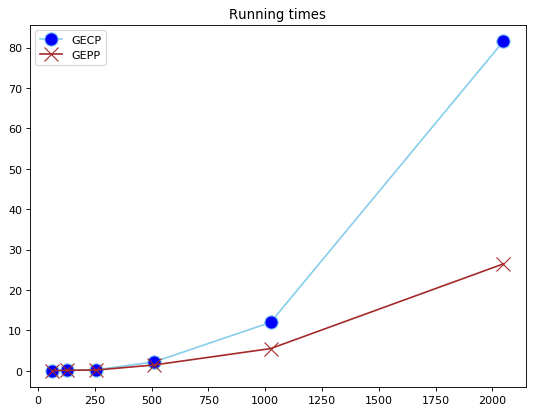

In [35]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

plt.plot( n, Results['GECP_Run_Time'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', label = 'GECP')
plt.plot( n, Results['GEPP_Run_Time'], marker='x', color='brown',markersize=12, label = 'GEPP')
plt.title('Running times')
plt.legend()

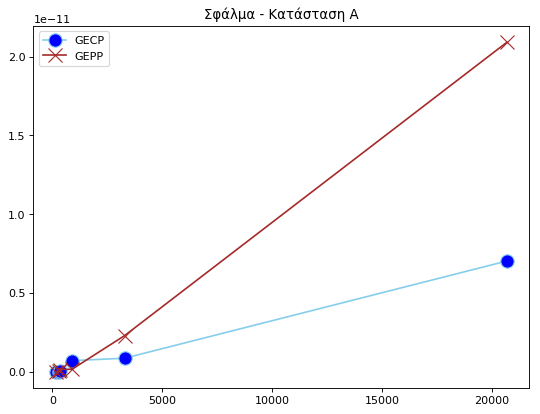

In [36]:
figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(Info['Cond_A'], Info['GECP_Solution_Error_InfNorm'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', label = 'GECP')
plt.plot(Info['Cond_A'], Info['GEPP_Solution_Error_InfNorm'], marker='x', color='brown',markersize=12, label = 'GEPP')
plt.title('Σφάλμα - Κατάσταση Α')
plt.legend()


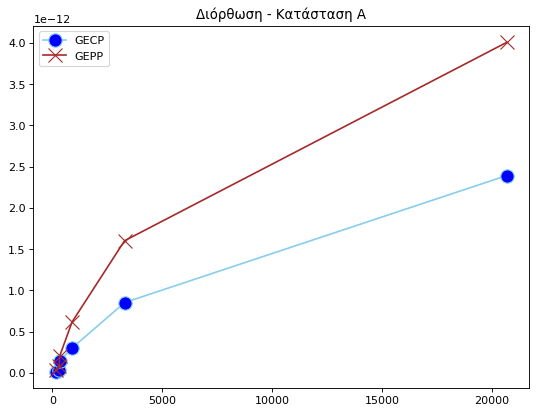

In [37]:
figure(num=None, figsize=(8,6), dpi=80)
plt.plot(Info['Cond_A'], Info['GECP_Residual_Error_InfNorm'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', label = 'GECP')
plt.plot(Info['Cond_A'], Info['GEPP_Residual_Error_InfNorm'], marker='x', color='brown',markersize=12, label = 'GEPP')
plt.title('Διόρθωση - Κατάσταση Α')
plt.legend()


======================================================================================================================

### Exercise 3

In [38]:
import pandas as pd
Results2 = pd.DataFrame(np.zeros((6,8)),
                       columns = ['GEPP_Run_Time',
                                  'GEPP_Validity',
                                  'GECP_Run_Time',
                                  'GECP_Validity',
                                  'Solver_PP_Run_Time',
                                  'Solver_PP_Validity',
                                  'Solver_CP_Run_Time',
                                  'Solver_CP_Validity'])

# Remove warnings when writing on the df
pd.options.mode.chained_assignment = None

### Run 1

In [39]:
# Random values for table A

np.random.seed(63490)

t=0


#creation of the A matrix
k = n[t]
A = np.identity(k)
A[k-1,k-1] = 0 #turn the last element to zero
A[:,k-1] += np.ones(k) # Add one the the last column

for i in range(k): # set the lower triagonal values to -1
    A[i+1:,i] = -1

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [40]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results2['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results2['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P1_pp_2 = P.copy()
L1_pp_2 = L.copy()
U1_pp_2 = U.copy()
x1_pp_2 = x.copy()

#-----------------------------------------------------------------------------

In [41]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results2['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results2['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P1_cp_2 = P.copy()
L1_cp_2 = L.copy()
U1_cp_2 = U.copy()
Q1_cp_2 = Q.copy()
x1_cp_2 = x.copy()

### Run 2

In [42]:
# Random values for table A

np.random.seed(73234)

t=1


#creation of the A matrix
k = n[t]
A = np.identity(k)
A[k-1,k-1] = 0 #turn the last element to zero
A[:,k-1] += np.ones(k) # Add one the the last column

for i in range(k): # set the lower triagonal values to -1
    A[i+1:,i] = -1

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [43]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results2['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results2['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P2_pp_2 = P.copy()
L2_pp_2 = L.copy()
U2_pp_2 = U.copy()
x2_pp_2 = x.copy()

#-----------------------------------------------------------------------------

In [44]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results2['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results2['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P2_cp_2 = P.copy()
L2_cp_2 = L.copy()
U2_cp_2 = U.copy()
Q2_cp_2 = Q.copy()
x2_cp_2 = x.copy()

### Run 3

In [45]:
# Random values for table A

np.random.seed(8423)

t=2


#creation of the A matrix
k = n[t]
A = np.identity(k)
A[k-1,k-1] = 0 #turn the last element to zero
A[:,k-1] += np.ones(k) # Add one the the last column

for i in range(k): # set the lower triagonal values to -1
    A[i+1:,i] = -1

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [46]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results2['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results2['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P3_pp_2 = P.copy()
L3_pp_2 = L.copy()
U3_pp_2 = U.copy()
x3_pp_2 = x.copy()

#-----------------------------------------------------------------------------


In [47]:

# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results2['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results2['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P3_cp_2 = P.copy()
L3_cp_2 = L.copy()
U3_cp_2 = U.copy()
Q3_cp_2 = Q.copy()
x3_cp_2 = x.copy()

### Run 4

In [48]:
# Random values for table A

np.random.seed(94353)

t=3


#creation of the A matrix
k = n[t]
A = np.identity(k)
A[k-1,k-1] = 0 #turn the last element to zero
A[:,k-1] += np.ones(k) # Add one the the last column

for i in range(k): # set the lower triagonal values to -1
    A[i+1:,i] = -1

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [49]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results2['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results2['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P4_pp_2 = P.copy()
L4_pp_2 = L.copy()
U4_pp_2 = U.copy()
x4_pp_2 = x.copy()

#-----------------------------------------------------------------------------

In [50]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results2['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results2['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P4_cp_2 = P.copy()
L4_cp_2 = L.copy()
U4_cp_2 = U.copy()
Q4_cp_2 = Q.copy()
x4_cp_2 = x.copy()

### Run 5

In [51]:
# Random values for table A

np.random.seed(104921)

t=4


#creation of the A matrix
k = n[t]
A = np.identity(k)
A[k-1,k-1] = 0 #turn the last element to zero
A[:,k-1] += np.ones(k) # Add one the the last column

for i in range(k): # set the lower triagonal values to -1
    A[i+1:,i] = -1

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [52]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results2['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results2['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P5_pp_2 = P.copy()
L5_pp_2 = L.copy()
U5_pp_2 = U.copy()
x5_pp_2 = x.copy()

#-----------------------------------------------------------------------------

In [53]:


# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results2['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results2['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P5_cp_2 = P.copy()
L5_cp_2 = L.copy()
U5_cp_2 = U.copy()
Q5_cp_2 = Q.copy()
x5_cp_2 = x.copy()

### Run 6

In [54]:
# Random values for table A

np.random.seed(122222)

t=5


#creation of the A matrix
k = n[t]
A = np.identity(k)
A[k-1,k-1] = 0 #turn the last element to zero
A[:,k-1] += np.ones(k) # Add one the the last column

for i in range(k): # set the lower triagonal values to -1
    A[i+1:,i] = -1

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

I have commented out the solver for this run because U produces inf values and it results in error.

In [55]:

# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results2['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

#x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results2['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

#Results2['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P6_pp_2 = P.copy()
L6_pp_2 = L.copy()
U6_pp_2 = U.copy()
#x6_pp_2 = x.copy()

#-----------------------------------------------------------------------------


C:\Users\akaplanis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in subtract


In [56]:

# GECP 
sec[0] = time.perf_counter()

P ,L ,U, Q = GECP(A)

sec[1] = time.perf_counter()

Results2['GECP_Run_Time'][t] =  sec[1]-sec[0]

Results2['GECP_Validity'][t] = np.allclose(A,np.dot(np.dot(np.dot(P.T,L),U),Q.T))

#-----------------------------------------------------------------------------

#Solver GECP

sec[0] = time.perf_counter()

x = LE_Solver_GECP(P,L,U,Q,b)

sec[1] = time.perf_counter()

Results2['Solver_CP_Run_Time'][t] =  sec[1]-sec[0]

Results2['Solver_CP_Validity'][t] = np.allclose(x,True_Solution)

P6_cp_2 = P.copy()
L6_cp_2 = L.copy()
U6_cp_2 = U.copy()
Q6_cp_2 = Q.copy()
x6_cp_2 = x.copy()

In [57]:
Results2

,GEPP_Run_Time,GEPP_Validity,GECP_Run_Time,GECP_Validity,Solver_PP_Run_Time,Solver_PP_Validity,Solver_CP_Run_Time,Solver_CP_Validity
0,0.052298,False,0.036743,True,0.000683,False,0.000697,True
1,0.075216,False,0.100098,True,0.000572,False,0.000917,True
2,0.257781,False,0.239185,True,0.000899,False,0.001377,True
3,0.789054,False,1.604494,True,0.006549,False,0.009291,True
4,4.624058,False,11.451890,True,0.041573,False,0.042697,True
5,21.146151,False,77.313078,True,0.000044,0,0.257459,True


=========================================================================================================================

### Exercise 4

In [58]:
#it is used to create the random vectoers with norm-2 equal to 1
from sklearn.preprocessing import normalize

In [59]:
import pandas as pd
Results3 = pd.DataFrame(np.zeros((6,4)),
                       columns = ['GEPP_Run_Time',
                                  'GEPP_Validity',
                                  'Solver_PP_Run_Time',
                                  'Solver_PP_Validity',])

# Remove warnings when writing on the df
pd.options.mode.chained_assignment = None

### Run 1

In [86]:
# Random values for table A



np.random.seed(182812)

t=0

A = np.random.randn(n[t],n[t])

u = np.random.randn(n[t],1)
y = np.random.rand(n[t],1)

u = normalize(u,norm = 'l2', axis=0)
y = normalize(y,norm = 'l2', axis=0)

uy = np.dot(u,y.T)

A = np.sum((A,uy),axis=0)

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [87]:
# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results3['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results3['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results3['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results3['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P1_pp_3 = P.copy()
L1_pp_3 = L.copy()
U1_pp_3 = U.copy()
x1_pp_3 = x.copy()

### Run 2

In [88]:
# Random values for table A



np.random.seed(23484)

t=1

A = np.random.randn(n[t],n[t])

u = np.random.randn(n[t],1)
y = np.random.rand(n[t],1)

u = normalize(u,norm = 'l2', axis=0)
y = normalize(y,norm = 'l2', axis=0)

uy = np.dot(u,y.T)

A = np.sum((A,uy),axis=0)

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [89]:
# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results3['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results3['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results3['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results3['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P2_pp_3 = P.copy()
L2_pp_3 = L.copy()
U2_pp_3 = U.copy()
x2_pp_3 = x.copy()

### Run 3

In [90]:
# Random values for table A



np.random.seed(349494)

t=2

A = np.random.randn(n[t],n[t])

u = np.random.randn(n[t],1)
y = np.random.rand(n[t],1)

u = normalize(u,norm = 'l2', axis=0)
y = normalize(y,norm = 'l2', axis=0)

uy = np.dot(u,y.T)

A = np.sum((A,uy),axis=0)

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [91]:
# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results3['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results3['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results3['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results3['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P3_pp_3 = P.copy()
L3_pp_3 = L.copy()
U3_pp_3 = U.copy()
x3_pp_3 = x.copy()

### Run 4

In [92]:
# Random values for table A



np.random.seed(44884)

t=3

A = np.random.randn(n[t],n[t])

u = np.random.randn(n[t],1)
y = np.random.rand(n[t],1)

u = normalize(u,norm = 'l2', axis=0)
y = normalize(y,norm = 'l2', axis=0)

uy = np.dot(u,y.T)

A = np.sum((A,uy),axis=0)

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [93]:
# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results3['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results3['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results3['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results3['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P4_pp_3 = P.copy()
L4_pp_3 = L.copy()
U4_pp_3 = U.copy()
x4_pp_3 = x.copy()

### Run 5

In [94]:
# Random values for table A



np.random.seed(539494)

t=4

A = np.random.randn(n[t],n[t])

u = np.random.randn(n[t],1)
y = np.random.rand(n[t],1)

u = normalize(u,norm = 'l2', axis=0)
y = normalize(y,norm = 'l2', axis=0)

uy = np.dot(u,y.T)

A = np.sum((A,uy),axis=0)

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [95]:
# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results3['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results3['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results3['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results3['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P5_pp_3 = P.copy()
L5_pp_3 = L.copy()
U5_pp_3 = U.copy()
x5_pp_3 = x.copy()

### Run 6

In [96]:
# Random values for table A



np.random.seed(6494)

t=5

A = np.random.randn(n[t],n[t])

u = np.random.randn(n[t],1)
y = np.random.rand(n[t],1)

u = normalize(u,norm = 'l2', axis=0)
y = normalize(y,norm = 'l2', axis=0)

uy = np.dot(u,y.T)

A = np.sum((A,uy),axis=0)

# True x
True_Solution = np.random.randn(n[t])

# b = Ax
b = np.dot(A,True_Solution)

#-----------------------------------------------------------------------------

In [97]:
# GEPP 
sec[0] = time.perf_counter()

P ,L ,U = GEPP(A)

sec[1] = time.perf_counter()

Results3['GEPP_Run_Time'][t] =  sec[1]-sec[0]

Results3['GEPP_Validity'][t] = np.allclose(A,np.dot(np.dot(P.T,L),U))

#-----------------------------------------------------------------------------

#Solver GEPP

sec[0] = time.perf_counter()

x = LE_Solver_GEPP(P,L,U,b)

sec[1] = time.perf_counter()

Results3['Solver_PP_Run_Time'][t] =  sec[1]-sec[0]

Results3['Solver_PP_Validity'][t] = np.allclose(x,True_Solution)

P6_pp_3 = P.copy()
L6_pp_3 = L.copy()
U6_pp_3 = U.copy()
x6_pp_3 = x.copy()

In [98]:
Results3

,GEPP_Run_Time,GEPP_Validity,Solver_PP_Run_Time,Solver_PP_Validity
0,0.040077,True,0.000817,True
1,0.078360,True,0.000558,True
2,0.267074,True,0.000960,True
3,0.837766,True,0.008412,True
4,4.106569,True,0.042223,True
5,21.762782,True,0.221390,True


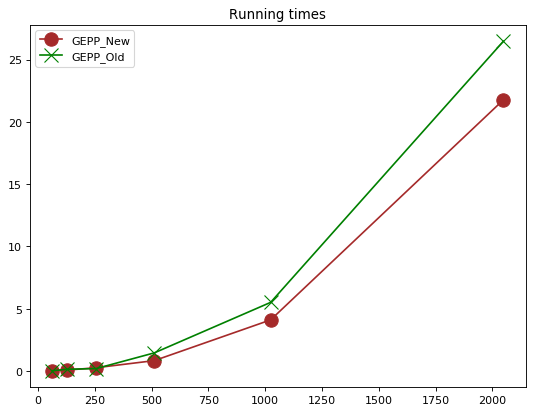

In [99]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

plt.plot( n, Results3['GEPP_Run_Time'], marker='o', color='brown',markersize=12, label = 'GEPP_New')
plt.plot( n, Results['GEPP_Run_Time'], marker='x', color='green',markersize=12, label = 'GEPP_Old')
plt.title('Running times')
plt.legend()

### Sherman - Morrison Implementation

The below is the part of code I used to implement the Sherman-Morrison formula. <br>
It replaced the line: <br>
**x = LE_Solver_GEPP(P,L,U,b)**


The resulting outcome was that by using twice **LE_Solver_GEPP** it increased the amount of running time.

In [ ]:
'''
# Sherman-Morrison
z = LE_Solver_GEPP(P,L,U,u)
y = LE_Solver_GEPP(P,L,U,b)
z = z.reshape(n[t])
y = y.reshape(n[t])

c = np.dot(v.T,y)
d = 1 + np.dot(v.T,z)
x = np.sum((y,(-1)*(c/d)*z),axis=0)'''